In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Solve the radiative transfer, the Schwarzschild, equation:
$$ dI_\nu = (-I_\nu + B_\nu(T)) n\sigma_\nu dz $$

In [30]:
#Some constants and simple functions
hbar=1.0546e-34 #J -s
c=3.e8 #m/w
kb=1.38e-23 #J/K
h=2*3.14159*hbar
def bnu(nu,T):
    b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)
    return b
    

/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_91744/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


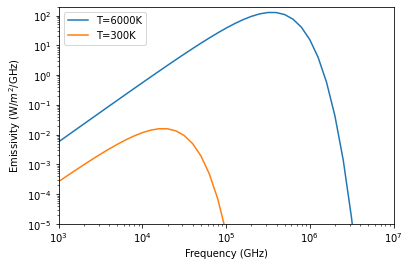

In [33]:
nulog = np.arange(6.,16,.1)
nu=10.**nulog
T=6000.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*1.e9,label='T=6000K')
T=300.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*1.e9,label='T=300K')
plt.xscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Emissivity (W/$m^2$/GHz)')
plt.yscale('log')
plt.axis([1000,1.e7,1.e-5,200])
plt.legend()

In [62]:
rsolar=6.955e8
lsolar=3.85e26
rorbit=1.5e11
rearth=6.37e6
T=6000.
print(lsolar/(4*3.14*rsolar**2))
print(lsolar/(4*3.14*rorbit**2))
print(kb*T/h/1.e9)

63368995.28609401
1362.3496107572541
124957.71305730598


In [36]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
ans=integrate.quad(bnuT,1.e12,1.e15)
print(ans)

(61882533.77209493, 3.514951480754711e-05)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_91744/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


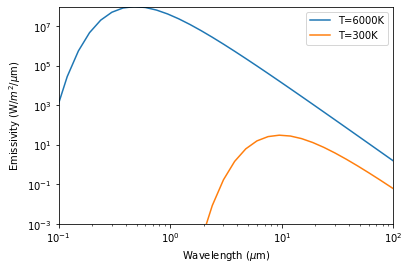

In [43]:
# To convert to W/m^2/wavelength, multiply by c
wavel =c/nu
# dP/d\lambda = dP/d\nu d\nu/d\lambda = dP/d\nu  c/\lambda^2 = dP/d\nu \nu^2/c
T=6000.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(wavel*1.e6,barr*nu**2/c/1.e6,label='T=6000K')
T=300.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(wavel*1.e6,barr*nu**2/c/1.e6,label='T=300K')
plt.xscale('log')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Emissivity (W/$m^2$/$\mu$m)')
plt.yscale('log')
plt.axis([.1,100,1.e-3,1.e8])
plt.legend()

In [80]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
numax=c/.3e-6 # wavelngths shorter than this are absorbed by high latitude atmosphere
ans=integrate.quad(bnuT,1.e12,numax)
# Radiance on Earth should be
# L_\odot*/4\pi*R_orbit**2
# = ans*R_\odot**2*/R_orbit**2
print(ans[0]*4*3.14*rsolar**2,ans[0]*(rsolar/rorbit)**2,(rearth/rorbit)**2)


3.759689639183023e+26 1330.39265363872 1.8034177777777776e-09


In [83]:
#Estimate for mean free path:
ppm=400.e-6
mco2=(12+2*16)*1.67e-27
ang=1.e-10
rco2=2*ang
rhoco2=ppm*1# kg/m^3, 
nco2=rhoco2/mco2
sigma=rco2**2
print(nco2*sigma)

217.74632553075665


In [136]:
km=1.e3
micron=1.e-6
y0=1366. # This is the total intensity integrated over all frequency.
# B_nu has dimensions of W/m^2 per Hz
# Divide by the typical frequency
y0=y0/1.e14
wavel=.5*micron
nu=c/wavel
Tground=288.
t=np.arange(200.,0.,-.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
kappa=.01*km # per km
lapse=6.5 #K/km
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z):
    T=Temp(z)
    didz=-(-y+bnu(nu,T))*kappa # minus sign since we're integrating downwards
    #print(T,nu,bnu(nu,T))
    return didz
inu=integrate.odeint(didz, y0, t)

Text(0, 0.5, 'Flux ($W/m^2$/GHz)')

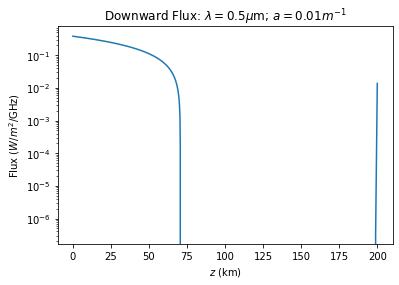

In [137]:
plt.plot(t,inu*1.e9)
plt.yscale('log')

plt.title('Downward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m; $a=$'+str(kappa/km)+'$m^{-1}$')
plt.xlabel('$z$ (km)')
plt.ylabel('Flux ($W/m^2$/GHz)')

In [161]:
## Upward flux
t=np.arange(0.,200.,.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
kappa=.1*km # per km
lapse=6.5 #K/km
wavel=5.*micron
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z):
    T=Temp(z)
    didz=(-y+bnu(nu,T))*kappa # minus sign since we're integrating downwards
    #print(T,nu,bnu(nu,T))
    return didz
nu=c/wavel
y0=bnu(nu,Tground)
inuup1=integrate.odeint(didz, y0, t)

2.0531738483763318e-05


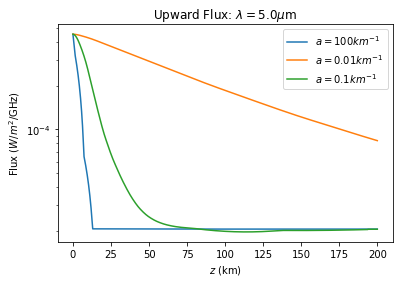

In [162]:
plt.plot(t,inuup1*1.e9,label='$a=100km^{-1}$')
plt.plot(t,inuup00001*1.e9,label='$a=0.01km^{-1}$')
plt.plot(t,inuup0001*1.e9,label='$a=0.1km^{-1}$')
plt.yscale('log')
plt.title('Upward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux ($W/m^2$/GHz)')
print(bnu(nu,220)*1.e9)

The above shows that when the optical depth is greater than unity, the emission is essentially that at $T=220$K or whatever the temperature is when the optical depth is unity. If the optical depth is less than unity, then the emission is just suppressed by $e^{-\tau}$. Now 5$\mu$m is near the peak of the Earth's emissions. At shorter wavelengths, there is very little emission, so ...

In [165]:
kappa=.00001*km # per km
lapse=6.5 #K/km
wavel=1.*micron
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z):
    T=Temp(z)
    didz=(-y+bnu(nu,T))*kappa # minus sign since we're integrating downwards
    #print(T,nu,bnu(nu,T))
    return didz
nu=c/wavel
y0=bnu(nu,Tground)
inuup00001=integrate.odeint(didz, y0, t)

4.575100688599269e-26


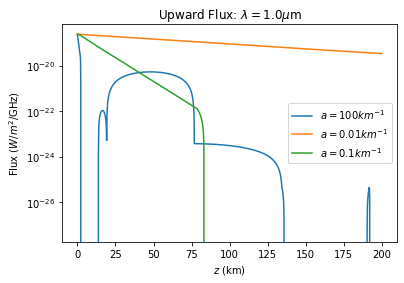

In [166]:
plt.plot(t,inuup1*1.e9,label='$a=100km^{-1}$')
plt.plot(t,inuup00001*1.e9,label='$a=0.01km^{-1}$')
plt.plot(t,inuup0001*1.e9,label='$a=0.1km^{-1}$')
plt.yscale('log')
plt.title('Upward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux ($W/m^2$/GHz)')
print(bnu(nu,220)*1.e9)